(3000, 3000)


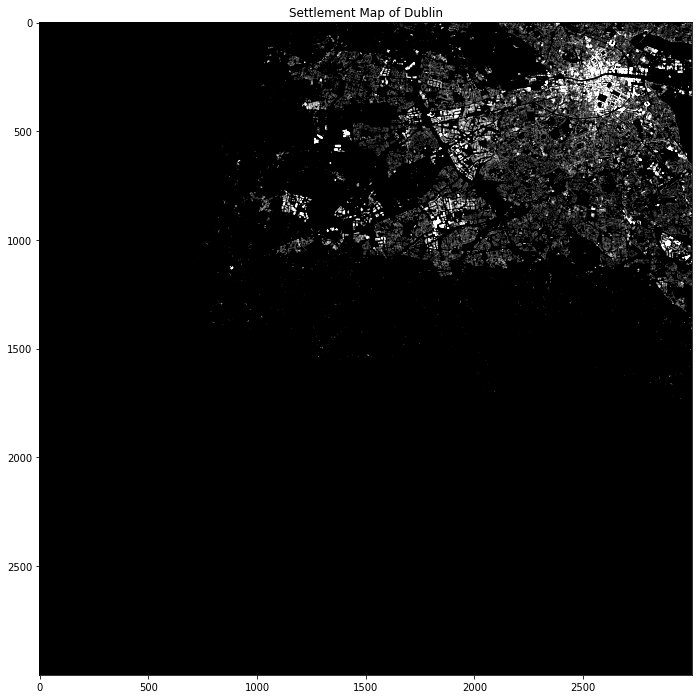

In [1]:
from osgeo import gdal
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

def output_view_gdal_height(band_data, vmin=1, MAX_HEIGHT=10):

    print(band_data.shape)
    
    #band_data = band_data[:1500, 500:]
    
    fig = plt.figure(figsize=(12,12))
    plt.title('Settlement Map of Dublin')
    plt.imshow(band_data, cmap='gray', vmin=vmin, vmax=MAX_HEIGHT)
    
    
    
def mask_building_height_with_settlement_map(height_raster, settle_map_path):
    
    settlement = gdal.Open(settle_map_path)

    settlement_data = settlement.GetRasterBand(1).ReadAsArray()
    masked_height_data = np.where(settlement_data>2, height_raster, 0)

    return masked_height_data

    
building_path = 'C:/Users/egnke/PythonCode/MetEireann/Dublin_Height_Data/tiled\X0002_Y0003/IE001L1_Dublin_UA2012_DHM_v010.tif'
settle_path = 'C:/Users/egnke/PythonCode/MetEireann/Settlement_Map/tiled/X0002_Y0003/settlement_map.tif'

build_height = gdal.Open(building_path)
height_data = build_height.GetRasterBand(1).ReadAsArray()

output_view_gdal_height(height_data)

(3000, 3000)


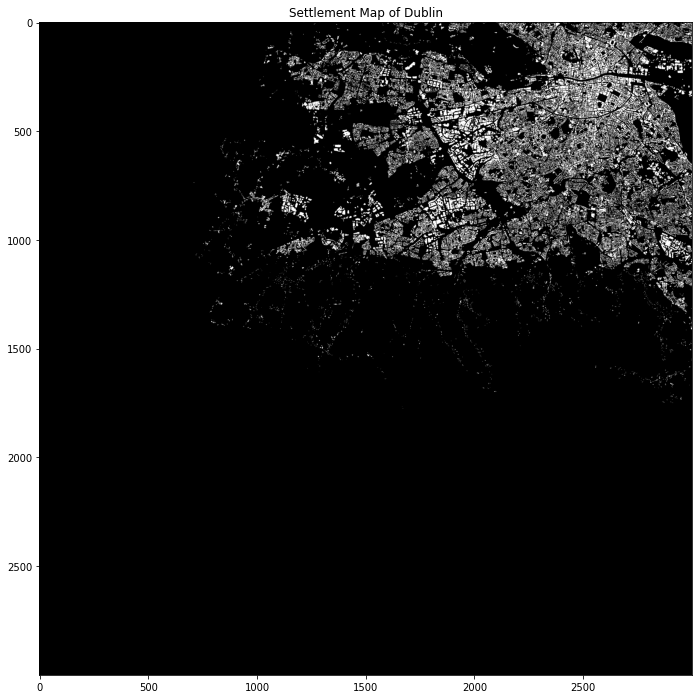

In [2]:
masked = np.where(height_data >=1, 1,0)
output_view_gdal_height(masked, vmin=0, MAX_HEIGHT=1)

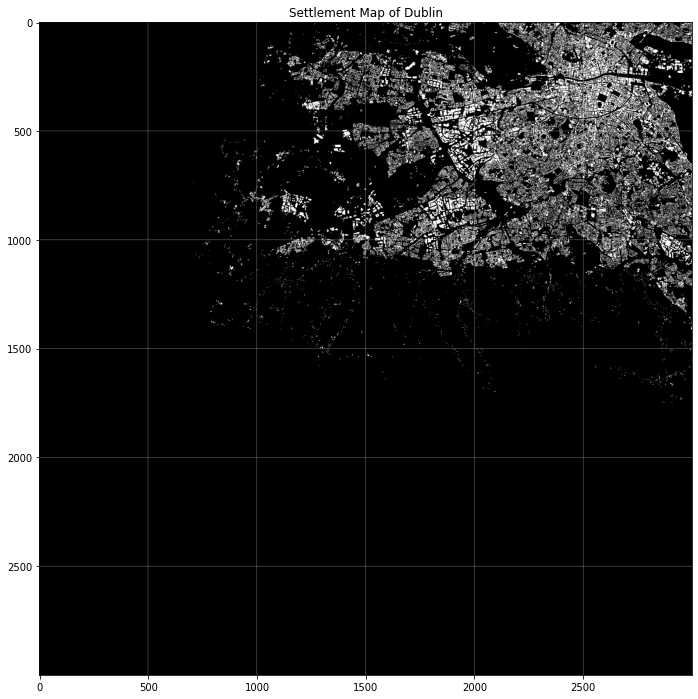

In [3]:
def plot_grid_over_image(image_raster, grid=(500,500), vmin=0, vmax=1):

    dx, dy = grid
    
    # Custom (rgb) grid color
    grid_color = 1
    
    image_raster = image_raster.copy()
    # Modify the image to include the grid
    image_raster[:,::dy]  = grid_color
    image_raster[::dx,:]  = grid_color
    
    #image_raster[:,int(dy/2)::dy]  = 1
    #image_raster[int(dx/2)::dx,:]  = 1
    
    
    # Show the result
    fig = plt.figure(figsize=(12,12))
    plt.title('Settlement Map of Dublin')
    plt.imshow(image_raster, cmap='gray', vmin=vmin, vmax=vmax)
    
'''
    create funciton to slide over to take overlaping samples in both the x and y direction
    only take samples that 
'''
plot_grid_over_image(masked, grid=(500,500))

In [17]:
def start_points(size, chunk_size, overlap=0):
    '''
    split an array into equal parts including overlap. used
    as the starting points then we add the size to each point to get
    the desired result.
    
    chunk_size: is the size of the stride length to take 
                i.e chunk_size = 2 [0,1,2,3] -> [0,2]
    overlap: is a float 0.5=50% of the overlap to take between chunk_sizes
            chunk_size:4, np.arange(10), overlap:0.5 [0, 4, 6] -> [0, 2, 4, 6]
    '''
    
    if(overlap>1 or overlap<0): raise ValueError('The Overlap Parameter must be between 0-1!')
    
    points = [0]
    stride = int(chunk_size * (1-overlap))
    counter = 1
    while True:
        
        pt = stride * counter
        
        if pt + chunk_size >= size:
            points.append(size - chunk_size)
            break
        else:
            points.append(pt)
        
        counter += 1
        
    return points


def create_csv_with_tiles_and_split_points(image_raster, split_width, split_height, overlap, filename):
    '''
    Create a csv file that has the overlapping split points for each tile 
    X0002_X0002, X0002_X0003, X0003_X0002, X0003_X0003
    these split points are only for the sub images that have building heights
    in them.
    '''
    
    is_binary = np.array_equal(image_raster, image_raster.astype(bool))
    if(!is_binary): raise ValueError('The image raster must be binary !')
    
    
    img_w, img_h = image_raster.shape
    
    X_start_points = start_points(size=img_w,
                                  chunk_size=split_width,
                                  overlap=overlap)
    
    Y_start_points = start_points(size=img_h,
                                  chunk_size=split_height,
                                  overlap=overlap)

    for i in Y_start_points:
        for j in X_start_points:
            
            split = image_raster[i:i+split_height, j:j+split_width]
            ratio_no_height = np.sum(split)/(split_width*split_height)
            
            if ratio_no_height > 0.08:
                
    



def split_image(image_raster, split_width, split_height, overlap, filename):
    '''
    split image into overlaping or non overlapping segments
    of specified size.
    
    '''
    img_w, img_h = image_raster.shape
    
    X_start_points = start_points(size=img_w,
                                  chunk_size=split_width,
                                  overlap=overlap)
    
    Y_start_points = start_points(size=img_h,
                                  chunk_size=split_height,
                                  overlap=overlap)

    count = 0
    name = 'splitted'
    frmt = 'jpeg'

    for i in Y_start_points:
        for j in X_start_points:
            split = img[i:i+split_height, j:j+split_width]
            cv2.imwrite('{}_{}.{}'.format(name, count, frmt), split)
            count += 1


create_csv_with_tiles_and_split_points(masked, 300, 300, 0.5, filename='test')

0.0
0.0
0.0
0.0
0.0
0.0018777777777777777
0.02532222222222222
0.07913333333333333
0.12576666666666667
0.14383333333333334
0.1433111111111111
0.16472222222222221
0.13045555555555555
0.07537777777777778
0.1862
0.3533777777777778
0.4318
0.3517222222222222
0.2134888888888889
0.0
0.0
0.0
0.0
0.0
0.0018333333333333333
0.021622222222222223
0.10606666666666667
0.17806666666666668
0.1877888888888889
0.20863333333333334
0.2740888888888889
0.2909888888888889
0.22693333333333332
0.26197777777777775
0.4037777777777778
0.4890555555555556
0.4240555555555556
0.2497
0.0
0.0
0.0
0.0
0.0009111111111111111
0.002211111111111111
0.0031666666666666666
0.05806666666666667
0.1262
0.14851111111111112
0.20345555555555556
0.2989111111111111
0.3809888888888889
0.3952888888888889
0.37433333333333335
0.40576666666666666
0.44354444444444446
0.42012222222222223
0.28957777777777777
0.0
0.0
0.0
5.555555555555556e-05
0.0024444444444444444
0.009622222222222223
0.01647777777777778
0.027177777777777776
0.0607
0.113011111111

False

In [16]:
1000/(300*300)

0.011111111111111112

In [90]:
print(x,y)

3000 3000
